### Introduction

Istanbul is a city with their huge population.

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

from bs4 import BeautifulSoup # Library for webscrabing
import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns
# import k-means from clustering stage
from sklearn.cluster import KMeans

import warnings  
warnings.filterwarnings("ignore")  # library to ignore warnings
!pip install folium
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


### Getting Istanbul Location 

In [2]:
address = 'Istanbul, Turkey'

geolocator = Nominatim(user_agent="istanbul")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Istanbul are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Istanbul are 41.0096334, 28.9651646.


### Creating Map of Istanbul

In [3]:
map_Istanbul = folium.Map(location=[latitude, longitude], zoom_start=11)
folium.Marker(location = [latitude,longitude],popup = 'Istanbul').add_to(map_Istanbul)
map_Istanbul

### Getting Boroughs of Istanbul from Wikipedia

In [4]:
from bs4 import BeautifulSoup
import requests

In [5]:
url = 'https://en.wikipedia.org/wiki/List_of_districts_of_Istanbul'
source = requests.get(url).text 

In [6]:
# Creating soup object
soup = BeautifulSoup(source,'lxml')


In [7]:
table = soup.find_all('table')

In [8]:
df = pd.read_html(str(table), flavor='bs4')[0]

### Understanding Our Dataset

In [9]:
df.head()

,District,Population (2020),Area (km²),Density (per km²),Mensual household income TL(USD),Annual household income TL(USD)
0,Adalar,16033,11.05,1451,6.652₺ (918$),"79.821₺ (10,978$)"
1,Arnavutköy,296709,450.35,659,2.030₺ (279$),"24.360₺ (3,350$)"
2,Ataşehir,422594,25.23,16750,6.577₺ (904$),"78.924₺ (10,854$)"
3,Avcılar,436897,42.01,10400,3.662₺ (503$),"43.938₺ (6,064$)"
4,Bağcılar,737206,22.36,32970,3.197₺ (441$),"38.367₺ (5,295$)"


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   District                          43 non-null     object
 1   Population (2020)                 43 non-null     int64 
 2   Area (km²)                        43 non-null     object
 3   Density (per km²)                 43 non-null     int64 
 4   Mensual household income TL(USD)  40 non-null     object
 5   Annual household income TL(USD)   40 non-null     object
dtypes: int64(2), object(4)
memory usage: 2.1+ KB


In [11]:
df.tail()

,District,Population (2020),Area (km²),Density (per km²),Mensual household income TL(USD),Annual household income TL(USD)
38,Zeytinburnu,283657,11.59,24474,3.644₺ (502$),6.036₺ (6.036$)
39,Europe (25 districts),9959793,"3,474.35 [2]",2867,NaN,NaN
40,Asia (14 districts),5502659,"1,868.87 [2]",2944,NaN,NaN
41,Urban (36 districts)[a],15149358,"2,576.85 [2]",5879,NaN,NaN
42,TOTAL,15462452,"5,343.22 [2][3]",2894,4.308₺ (594$)[4],"51.691₺ (7,134$)[5]"


### Dropping Unneccessary Rows

In [12]:
df = df[:39] # We get rid of last 3 columns.

### Changing the Column Names

In [13]:
column_names = ['Borough','Population','Area','Density','Mensual_Household_Income','Annual_Income']

In [14]:
df.columns = column_names

### Preprocessing Columns and Reformatting

- In this section we will delete symbol,paranthesis, and we will get only try prices and deleting decimals from Area since it won't impact our analysis further. 

#### 'Mensual_Household'

In [15]:
df['Mensual_Household_Income'] = df['Mensual_Household_Income'].apply(lambda x : str(x).split('(')[0].strip(' ').replace('₺','').replace('.',''))

In [16]:
df['Mensual_Household_Income'] = df['Mensual_Household_Income'].astype('int64')

#### Annual Income

In [17]:
df['Annual_Income'] = df['Annual_Income'].apply(lambda x : str(x).split('(')[0].strip(' ').replace('₺','').replace('.',''))

In [18]:
df['Annual_Income'] = df['Annual_Income'].astype('int64')

#### 'Area'

In [19]:
df['Area'] = df['Area'].apply(lambda x : x.split('.')[0])

In [20]:
df['Area'] = df['Area'].astype('int64')

#### Let's see our cleaned dataset

In [21]:
df.head()

,Borough,Population,Area,Density,Mensual_Household_Income,Annual_Income
0,Adalar,16033,11,1451,6652,79821
1,Arnavutköy,296709,450,659,2030,24360
2,Ataşehir,422594,25,16750,6577,78924
3,Avcılar,436897,42,10400,3662,43938
4,Bağcılar,737206,22,32970,3197,38367


### Getting Location of Each Borough

In [22]:
Latitude = []
Longitude = []
for i in df['Borough'].values:
    geolocator = Nominatim(user_agent="Istanbul")
    location = geolocator.geocode(i)
    latitude = location.latitude
    longitude = location.longitude
    Latitude.append(latitude)
    Longitude.append(longitude)

In [23]:
## creating columns of latitude and longitude
df['Latitude'] = Latitude
df['Longitude'] = Longitude

In [24]:
df.head()

,Borough,Population,Area,Density,Mensual_Household_Income,Annual_Income,Latitude,Longitude
0,Adalar,16033,11,1451,6652,79821,40.876259,29.091027
1,Arnavutköy,296709,450,659,2030,24360,41.184471,28.741245
2,Ataşehir,422594,25,16750,6577,78924,40.984749,29.106720
3,Avcılar,436897,42,10400,3662,43938,40.980135,28.717547
4,Bağcılar,737206,22,32970,3197,38367,41.033899,28.857898


### Creating Map Showing all Our Borough's Location

In [25]:
map_Istanbul
for lat, lng, label in zip(df['Latitude'],df['Longitude'],df['Borough']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Istanbul)  
map_Istanbul

### Exploratory Data Analysis

### Let's see Annual Income Distribution

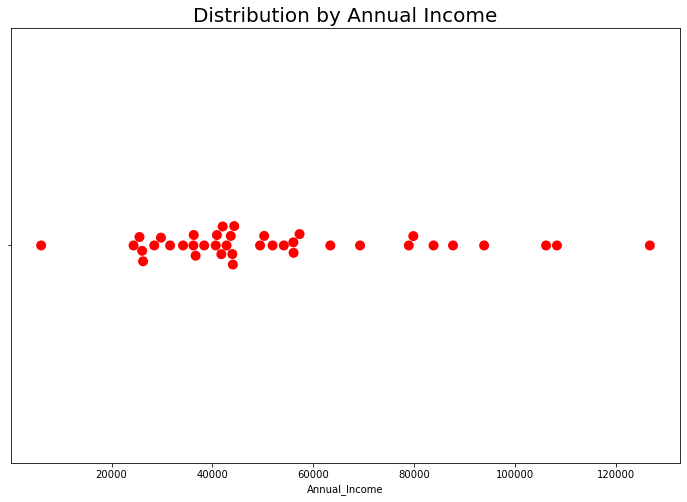

In [26]:
plt.figure(figsize=(12,8))
sns.swarmplot(x='Annual_Income',data=df,s=10,color='r')
plt.title('Distribution by Annual Income',fontsize=20)
plt.show()

- We see that most boroughs annual income are between 30000 and 60000
- There is only one borough below 20000
- A couple borough have higher annual income compared to others

#### Let's plot the borough by their annual income

In [27]:
df.isnull().sum() # check if the dataset has any missing values

Borough                     0
Population                  0
Area                        0
Density                     0
Mensual_Household_Income    0
Annual_Income               0
Latitude                    0
Longitude                   0
dtype: int64

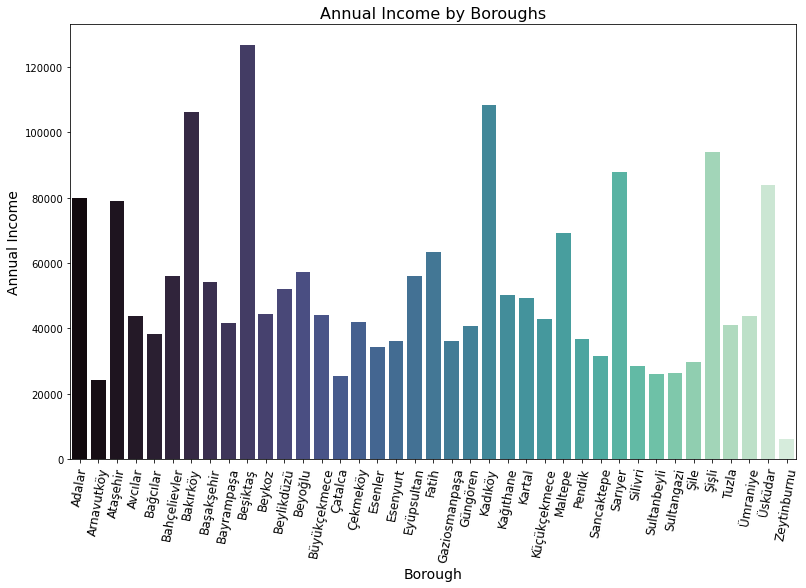

In [230]:
plt.figure(figsize=(13,8))
plt.xticks(rotation =80,fontsize= 12)
sns.barplot(x='Borough',y = 'Annual_Income',data = df,palette="mako")
plt.title("Annual Income by Boroughs",fontsize=16)
plt.xlabel("Borough",fontsize = 14)
plt.ylabel("Annual Income",fontsize = 14)
plt.show()

- We see that people who live in Besiktas and Kadikoy have the higger annual income compared to others.

In [29]:
(df.groupby('Borough')['Annual_Income'].sum().to_frame()).sort_values(by='Annual_Income',ascending=False).head(5)

,Annual_Income
Borough,
Beşiktaş,126720
Kadıköy,108300
Bakırköy,106140
Şişli,93864
Sarıyer,87696


#### What is the annual income of boroughs that have high population ?


In [30]:
df[['Borough','Population','Annual_Income']].sort_values(by='Population',ascending=False).head(5)

,Borough,Population,Annual_Income
17,Esenyurt,957398,36288
25,Küçükçekmece,789633,42804
4,Bağcılar,737206,38367
27,Pendik,726481,36664
36,Ümraniye,713803,43641


#### Let's see which borough has the highest population value ?

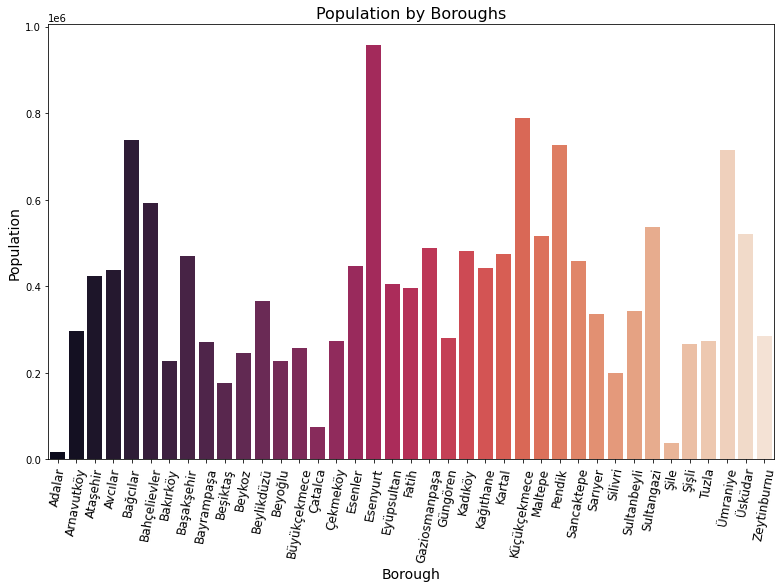

In [224]:
plt.figure(figsize=(13,8))
plt.xticks(rotation =80,fontsize= 12)
sns.barplot(x='Borough',y = 'Population',data = df,palette="rocket")
plt.title("Population by Boroughs",fontsize=16)
plt.xlabel("Borough",fontsize = 14)
plt.ylabel("Population",fontsize = 14)
plt.show()

- We see that Esenyurt has the highest population 

In [32]:
(df.groupby('Borough')['Population'].sum().to_frame()).sort_values(by='Population',ascending=False).head(5)

,Population
Borough,
Esenyurt,957398
Küçükçekmece,789633
Bağcılar,737206
Pendik,726481
Ümraniye,713803


### Let's see the Area of Each Borough

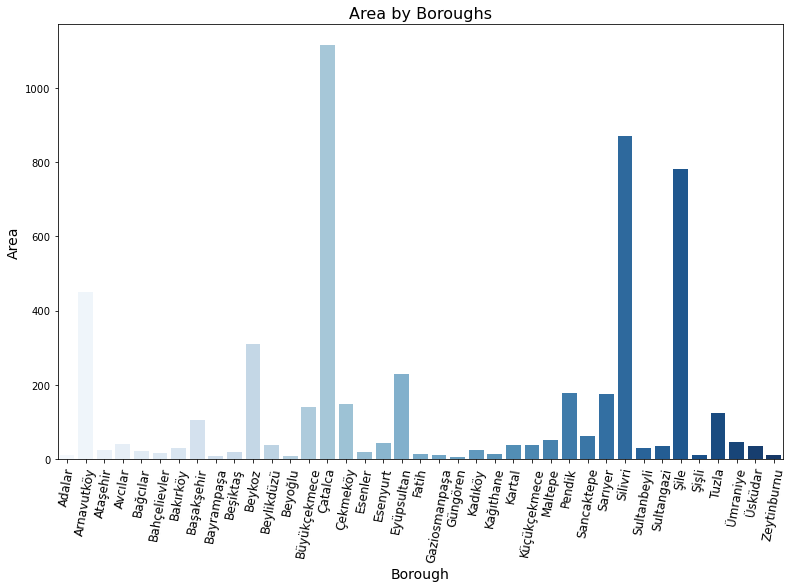

In [270]:
plt.figure(figsize=(13,8))
plt.xticks(rotation =80,fontsize= 12)
sns.barplot(x='Borough',y = 'Area',data = df,palette="Blues")
plt.title("Area by Boroughs",fontsize=16)
plt.xlabel("Borough",fontsize = 14)
plt.ylabel("Area",fontsize = 14)
plt.show()

- #### We see that Çatalca has the highest area 


### Defining Foursquare Credentials

In [34]:
CLIENT_ID = 'VHSRNVSILNXIFQX235HYJLCMKWK1G0IEARKJIAI11ESIBXVX' # your Foursquare ID
CLIENT_SECRET = 'KJO4ZU3EQD150F5VD5RXFHI3WIDR4WS1USF2XK04N4PIZB21' # your Foursquare Secret
VERSION = '20210414' # Foursquare API version

In [35]:
lat = 40.991572
long= 29.027017
LIMIT = 50
radius = 500 

In [36]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat, long,VERSION,radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=VHSRNVSILNXIFQX235HYJLCMKWK1G0IEARKJIAI11ESIBXVX&client_secret=KJO4ZU3EQD150F5VD5RXFHI3WIDR4WS1USF2XK04N4PIZB21&ll=40.991572,29.027017&v=20210414&radius=500&limit=50'

In [ ]:
categories_url = 'https://api.foursquare.com/v2/venues/categories?client_id={}&client_secret={}&v={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
            
# make the GET request
results = requests.get(categories_url).json()

In [ ]:
categories_list = []
# Let's print only the top-level categories and their IDs and also add them to categories_list

def print_categories(categories, level=0, max_level=0):    
    if level>max_level: return
    out = ''
    out += '-'*level
    for category in categories:
        print(out + category['name'] + ' (' + category['id'] + ')')
        print_categories(category['categories'], level+1, max_level)
        categories_list.append((category['name'], category['id']))
        
print_categories(results['response']['categories'], 0, 0)

In [ ]:

def get_venues_count(lat,long, radius, categoryId):
    explore_url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&categoryId={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION,
                lat,
                long,
                radius,
                categoryId)

    # make the GET request
    return requests.get(explore_url).json()['response']['totalResults']

In [ ]:
#Create new dataframe to store venues data
df_venues = df.copy()
for c in categories_list:
    df_venues[c[0]] = 0
    
df_venues.head()

In [ ]:
#Request number of venues, store result as CSV
#for i, row in df_venues.iterrows():
 #   for c in categories_list:        
  #      df_venues.loc[i, c[0]] = get_venues_count(df_venues.Latitude.iloc[i], df_venues.Longitude.iloc[i], radius=1000, categoryId=c[1])
   # print(i)
    #df_venues.to_csv('venues.csv')

In [283]:
## Load the new dataset
venues_data = pd.read_csv('venues.csv')

In [284]:
venues_data.head()

,Unnamed: 0,Borough,Population,Area,Density,Mensual_Household_Income,Annual_Income,Latitude,Longitude,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,0,Adalar,16033,11,1451,6652,79821,40.876259,29.091027,5,5,0,64,8,46,25,2,7,26
1,1,Arnavutköy,296709,450,659,2030,24360,41.184471,28.741245,17,24,8,78,10,51,101,19,90,13
2,2,Ataşehir,422594,25,16750,6577,78924,40.984749,29.106720,28,102,8,190,35,106,162,74,113,54
3,3,Avcılar,436897,42,10400,3662,43938,40.980135,28.717547,41,64,10,207,78,101,114,48,105,75
4,4,Bağcılar,737206,22,32970,3197,38367,41.033899,28.857898,52,82,18,128,34,111,107,32,103,26


In [285]:
venues_data=venues_data.drop('Unnamed: 0',axis=1) # dropping unnecessary columns

### Understanding Our Data

In [286]:
df_venues = venues_data.iloc[:,[0,8,9,10,11,12,13,14,15,16,17]]
df_venues.head()

,Borough,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,Adalar,5,5,0,64,8,46,25,2,7,26
1,Arnavutköy,17,24,8,78,10,51,101,19,90,13
2,Ataşehir,28,102,8,190,35,106,162,74,113,54
3,Avcılar,41,64,10,207,78,101,114,48,105,75
4,Bağcılar,52,82,18,128,34,111,107,32,103,26


In [287]:
df_venues.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Borough                      39 non-null     object
 1   Arts & Entertainment         39 non-null     int64 
 2   College & University         39 non-null     int64 
 3   Event                        39 non-null     int64 
 4   Food                         39 non-null     int64 
 5   Nightlife Spot               39 non-null     int64 
 6   Outdoors & Recreation        39 non-null     int64 
 7   Professional & Other Places  39 non-null     int64 
 8   Residence                    39 non-null     int64 
 9   Shop & Service               39 non-null     int64 
 10  Travel & Transport           39 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 3.5+ KB


In [288]:
df_venues.shape

(39, 11)

### Exploratory Data Analysis

In [289]:
df_venues.describe()

,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
count,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,31.846154,43.666667,7.384615,132.153846,32.512821,71.897436,103.871795,35.666667,82.307692,41.410256
std,32.094055,29.701438,5.024233,70.496561,40.856534,31.302257,46.772788,25.806296,45.404123,36.536728
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.500000,15.500000,4.000000,79.500000,11.000000,52.000000,79.500000,19.000000,56.000000,12.500000
50%,27.000000,41.000000,6.000000,147.000000,19.000000,81.000000,112.000000,32.000000,85.000000,34.000000
75%,42.000000,68.000000,10.000000,186.000000,35.000000,95.000000,135.000000,48.500000,113.500000,58.500000
max,150.000000,102.000000,21.000000,249.000000,215.000000,111.000000,193.000000,132.000000,173.000000,156.000000


In [290]:
df_venues.tail()

,Borough,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
34,Şişli,63,76,10,200,56,100,151,73,116,95
35,Tuzla,8,4,3,16,10,5,7,1,6,2
36,Ümraniye,25,68,5,174,19,89,122,51,113,52
37,Üsküdar,43,59,6,153,17,87,117,17,87,76
38,Zeytinburnu,31,41,7,163,35,75,115,49,135,47


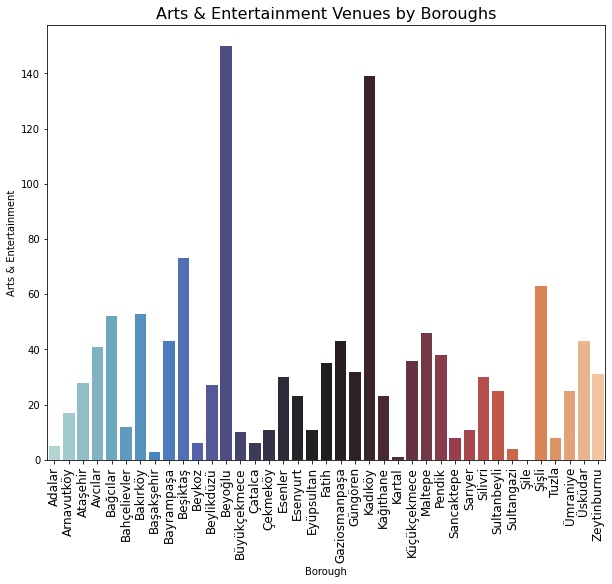

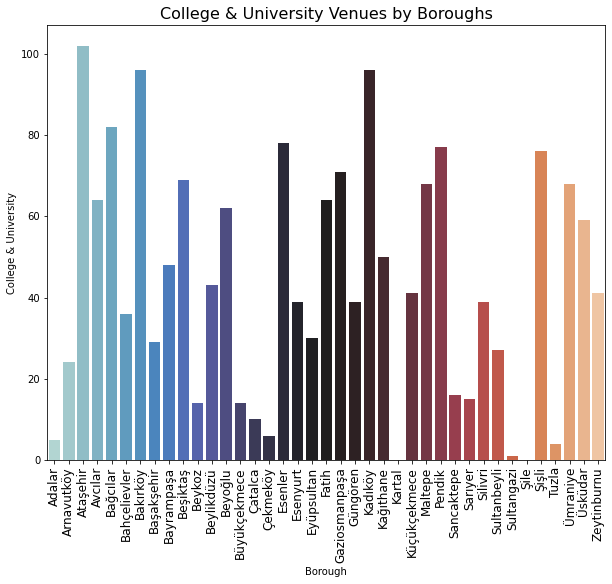

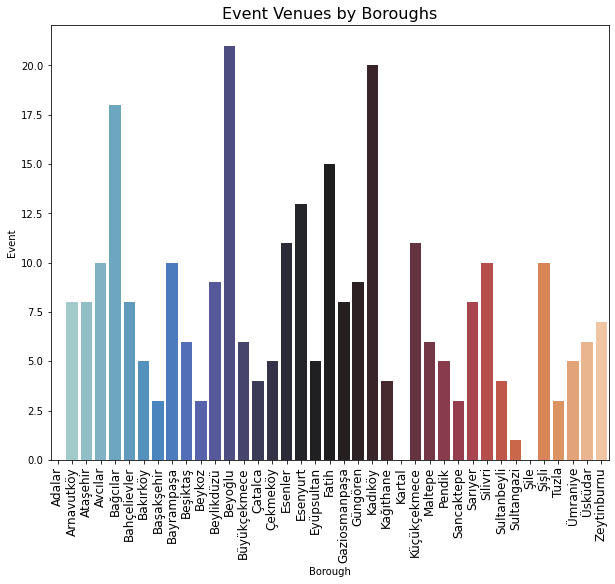

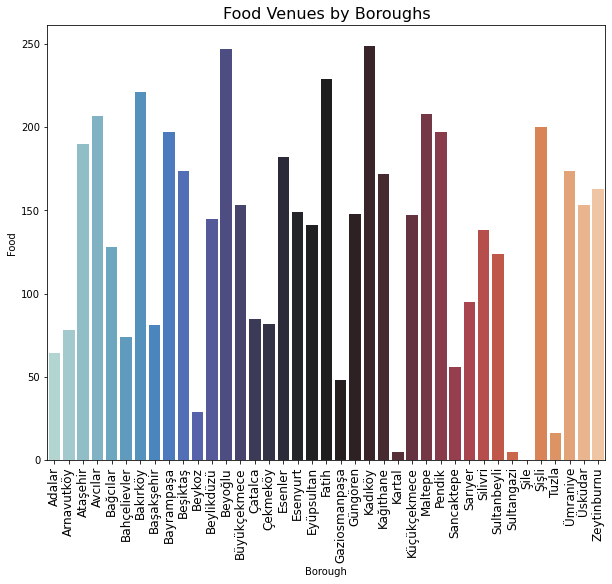

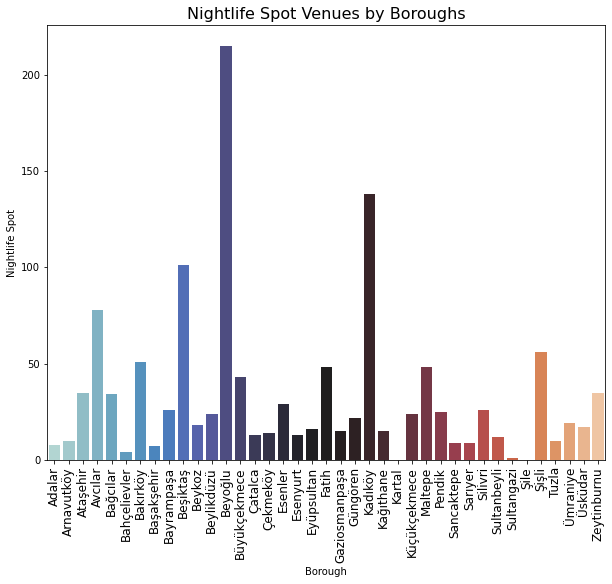

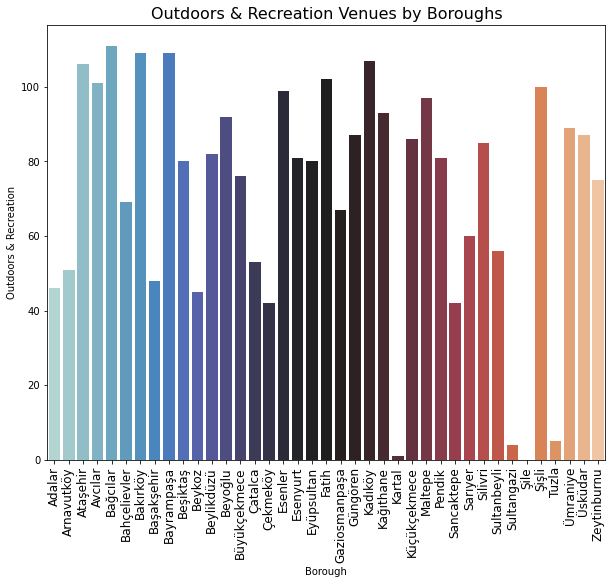

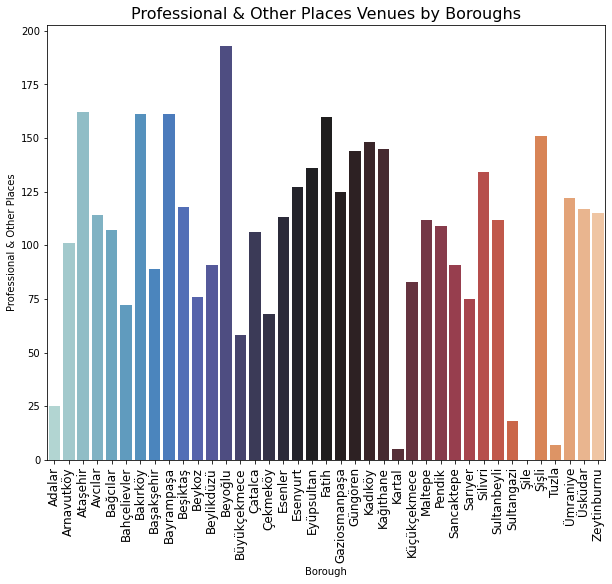

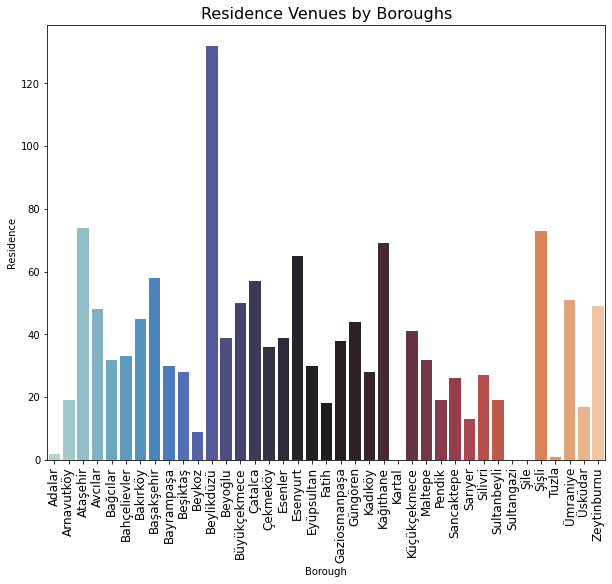

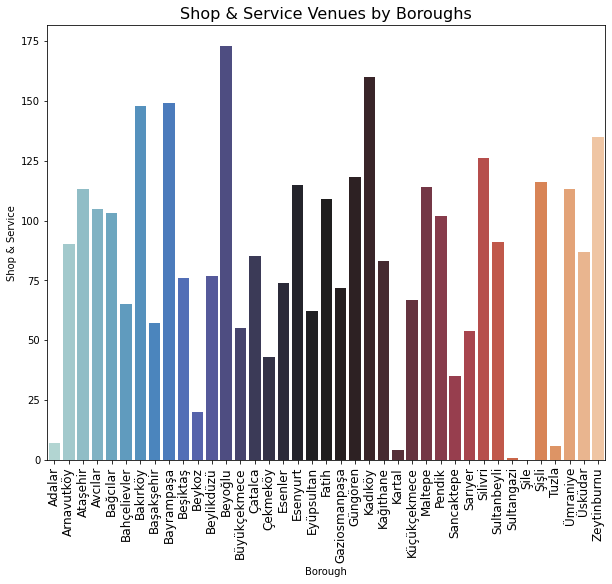

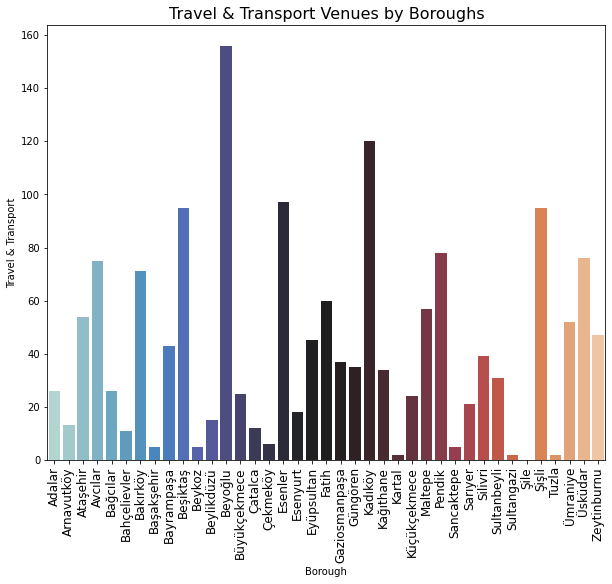

In [291]:
    for i in df_venues.describe().columns:
        plt.figure(figsize=(10,8))
        plt.xticks(fontsize=12,rotation=90)
        plt.title(i+' Venues by Boroughs',fontsize=16)
        sns.barplot(x='Borough',y=i,data=df_venues,palette='icefire')
        plt.show()

### Let's see how many venues each borough has ?

In [292]:
venues_list = ["Arts & Entertainment","College & University","Event","Food","Nightlife Spot","Outdoors & Recreation","Professional & Other Places","Residence","Shop & Service","Travel & Transport"]

In [293]:
df_venues["Total_Venues"] = df_venues.loc[:,venues_list].sum(axis=1)

In [294]:
df_venues.head()

,Borough,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport,Total_Venues
0,Adalar,5,5,0,64,8,46,25,2,7,26,188
1,Arnavutköy,17,24,8,78,10,51,101,19,90,13,411
2,Ataşehir,28,102,8,190,35,106,162,74,113,54,872
3,Avcılar,41,64,10,207,78,101,114,48,105,75,843
4,Bağcılar,52,82,18,128,34,111,107,32,103,26,693


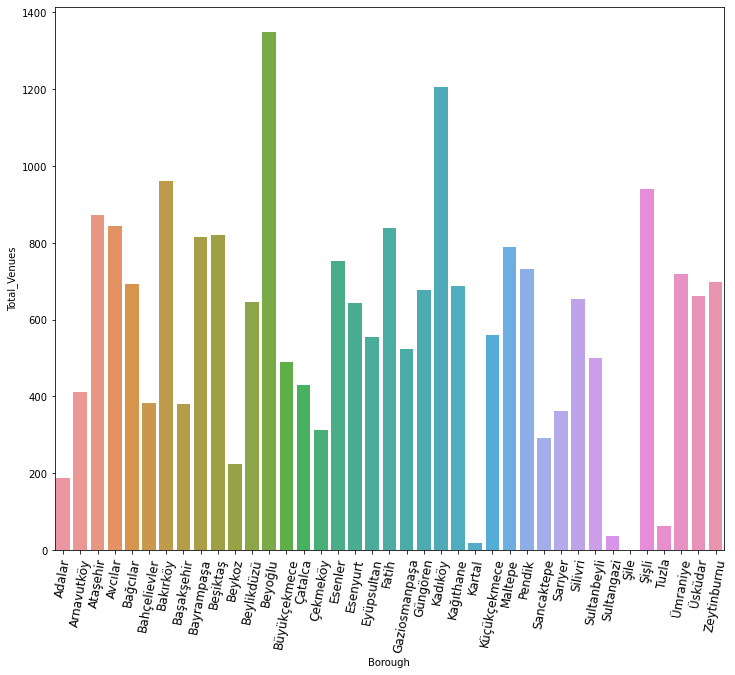

In [295]:
plt.figure(figsize=(12,10))
plt.xticks(rotation =80,fontsize= 12)
sns.barplot(x = "Borough",y = "Total_Venues",data = df_venues)
plt.show()

#### In general When we want to explore total venues for each borough We can see that Beyoglu and Kadikoy have the higher number compared to others.


## Clustering Boroughs based on Venues 

#### Let's first merge our datasets . Because We would like to include some variable from first dataset to our model.

In [296]:
new_dataset = pd.merge(df, df_venues, on="Borough")
new_dataset.head()

,Borough,Population,Area,Density,Mensual_Household_Income,Annual_Income,Latitude,Longitude,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport,Total_Venues
0,Adalar,16033,11,1451,6652,79821,40.876259,29.091027,5,5,0,64,8,46,25,2,7,26,188
1,Arnavutköy,296709,450,659,2030,24360,41.184471,28.741245,17,24,8,78,10,51,101,19,90,13,411
2,Ataşehir,422594,25,16750,6577,78924,40.984749,29.106720,28,102,8,190,35,106,162,74,113,54,872
3,Avcılar,436897,42,10400,3662,43938,40.980135,28.717547,41,64,10,207,78,101,114,48,105,75,843
4,Bağcılar,737206,22,32970,3197,38367,41.033899,28.857898,52,82,18,128,34,111,107,32,103,26,693


## Dropping columns that is not used for clustering.

In [297]:
dropped_columns = ["Borough","Mensual_Household_Income","Latitude","Longitude","Event","Total_Venues","Area"]

In [298]:
cluster_dataset = new_dataset.drop(dropped_columns,axis=1)
cluster_dataset.head()

,Population,Density,Annual_Income,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,16033,1451,79821,5,5,64,8,46,25,2,7,26
1,296709,659,24360,17,24,78,10,51,101,19,90,13
2,422594,16750,78924,28,102,190,35,106,162,74,113,54
3,436897,10400,43938,41,64,207,78,101,114,48,105,75
4,737206,32970,38367,52,82,128,34,111,107,32,103,26


### Now We have new data set that will be used by algorithm

### Standardize Our Data

#### Since KMeans algorithm uses distance between variable. It may occur uncertainty with different magnitude of columns. To avoid this, We need to scale our dataset

In [299]:
from sklearn.preprocessing import StandardScaler

In [300]:
scaler = StandardScaler()
scaled_venues=scaler.fit_transform(cluster_dataset)

### Clustering Our Data using KMeans  

In [301]:
from sklearn.cluster import KMeans

In [302]:
kmeans = KMeans()

### Choosing the best K by using Elbow Method

#### The KMeans algorithm clusters data by trying to separate samples in n groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares. To optimize our model We need to choose right k value. We will use the elbow method to do that. 

In [303]:
n_clusters=10
cost=[]
for i in range(1,n_clusters):
    kmeans= KMeans(i)
    kmeans.fit(scaled_venues)
    cost.append(kmeans.inertia_)

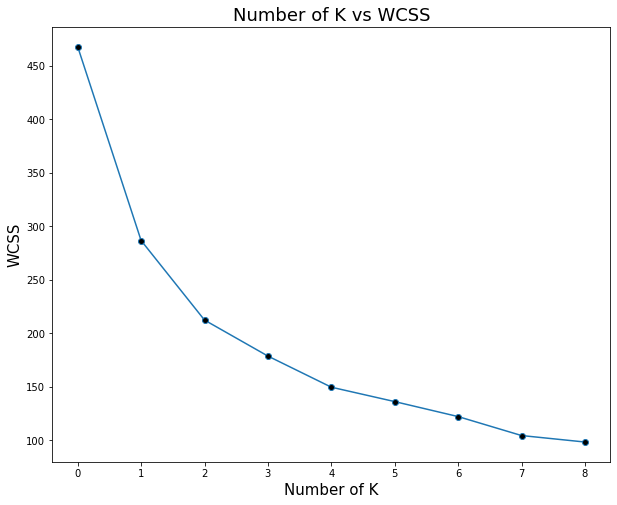

In [304]:
plt.figure (figsize = (10,8))
plt.plot(cost,marker = "o",markerfacecolor='black')
plt.xlabel("Number of K",fontsize =15)
plt.ylabel("WCSS",fontsize =15)
plt.title("Number of K vs WCSS",fontsize=18)
plt.show()

#### We will set the number of k = 3 to get one more group of boroughs

In [305]:
kmeans = KMeans(n_clusters=3)

In [306]:
kmeans.fit(scaled_venues)

KMeans(n_clusters=3)

In [307]:
kmeans.labels_

array([1, 1, 0, 0, 0, 0, 2, 1, 0, 2, 1, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       2, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 2, 1, 0, 0, 0])

In [308]:
cluster_dataset["Labels"]= kmeans.labels_   ### getting labels

### Cluster 0

In [309]:
cluster_dataset[cluster_dataset['Labels']==0].reset_index().drop("index",axis=1)

,Population,Density,Annual_Income,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport,Labels
0,422594,16750,78924,28,102,190,35,106,162,74,113,54,0
1,436897,10400,43938,41,64,207,78,101,114,48,105,75,0
2,737206,32970,38367,52,82,128,34,111,107,32,103,26,0
3,592371,35642,56088,12,36,74,4,69,72,33,65,11,0
4,269950,28091,41762,43,48,197,26,109,161,30,149,43,0
5,365572,9676,51924,27,43,145,24,82,91,132,77,15,0
6,446276,24215,34164,30,78,182,29,99,113,39,74,97,0
7,957398,22198,36288,23,39,149,13,81,127,65,115,18,0
8,405845,1777,56044,11,30,141,16,80,136,30,62,45,0
9,396594,25439,63378,35,64,229,48,102,160,18,109,60,0


### Cluster 1

In [310]:
cluster_dataset[cluster_dataset['Labels']==1].reset_index().drop("index",axis=1)

,Population,Density,Annual_Income,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport,Labels
0,16033,1451,79821,5,5,64,8,46,25,2,7,26,1
1,296709,659,24360,17,24,78,10,51,101,19,90,13,1
2,469924,4506,54152,3,29,81,7,48,89,58,57,5,1
3,246110,793,44316,6,14,29,18,45,76,9,20,5,1
4,257362,1849,44049,10,14,153,43,76,58,50,55,25,1
5,74975,67,25536,6,10,85,13,53,106,57,85,12,1
6,273658,1848,42033,11,6,82,14,42,68,36,43,6,1
7,474514,12312,49443,1,0,5,0,1,5,0,4,2,1
8,456861,7319,31602,8,16,56,9,42,91,26,35,5,1
9,335298,1912,87696,11,15,95,9,60,75,13,54,21,1


### Cluster 2

In [311]:
cluster_dataset[cluster_dataset['Labels']==2].reset_index().drop("index",axis=1)

,Population,Density,Annual_Income,Arts & Entertainment,College & University,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport,Labels
0,226229,7633,106140,53,96,221,51,109,161,45,148,71,2
1,176513,9801,126720,73,69,174,101,80,118,28,76,95,2
2,226396,25409,57275,150,62,247,215,92,193,39,173,156,2
3,481983,19210,108300,139,96,249,138,107,148,28,160,120,2
4,266793,24911,93864,63,76,200,56,100,151,73,116,95,2


### Results

- **Cluster 0** : This group has the lowest venue and people who live in these boroughs has average annual.Their population is also lower than others in general.
- **Cluster 1** : Boroughs in this group has higher population compared to cluster 0. There are many food venue. Annual income of this group is average of entire boroughs.It is a middle segment group of our analysis.

- **Cluster 2** : This group has higher number of venues and annual income. There are many Transportation ,Food Venues,Nightlife Spot in this group.If our menu is expensive. We can choose to start with this group.

### Visualization Our Group of Boroughs

#### We will use principal component analysis to visualize our groups

In [312]:
from sklearn.decomposition import PCA

In [313]:
pca = PCA(n_components=2)

In [314]:
pca_df = pca.fit_transform(scaled_venues)

In [315]:
columns = ['pca1','pca2']

In [316]:
pca_df = pd.DataFrame(pca_df,columns=columns)

In [317]:
pca_df['Cluster'] = kmeans.labels_

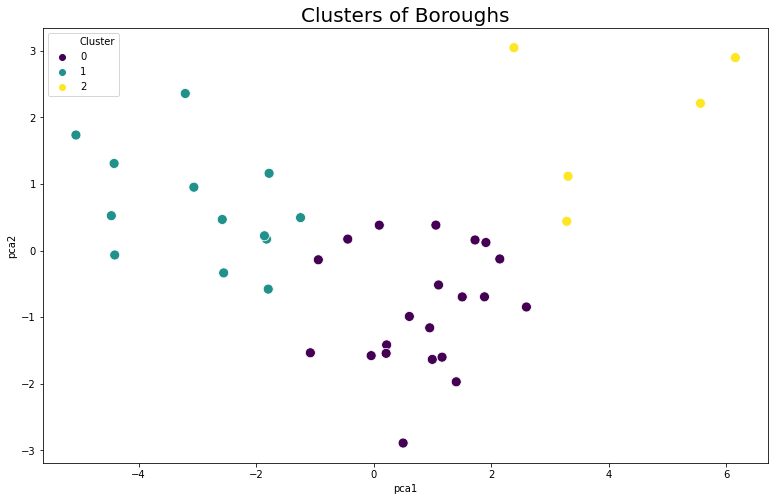

In [318]:
plt.figure(figsize=(13,8))
sns.scatterplot(x='pca1',y='pca2',hue='Cluster',s=100,data=pca_df,palette='viridis')
plt.title("Clusters of Boroughs",fontsize=20)
plt.show()


## Results

**Cluster 0** : This group has the lowest venue and people who live in these boroughs has average annual.Their population is also lower than others in general.

**Cluster 1** : Boroughs in this group has higher population compared to cluster 0. There are many food venue. Annual income of this group is average of entire boroughs.It is a middle segment group of our analysis.

**Cluster 2** : This group has higher number of venues and annual income. There are many Transportation ,Food Venues,Nightlife Spot in this group.If our menu is expensive. We can choose to start with this group.


## Discussion

 In this project , We used K-Means algorithm to cluster our dataset.K-Means clustering algorithm is moslty used algorithm amongst Unsupervised Learning.After we explore our dataset with venues information. With this study , We can get important information based on Boroughs.To get business decision to open a restaurant , We could also expand our dataset with venues name,population details etc. to target more specifically.This project also can be used for people who have never been to Istanbul but want to know basic information about venues, type of boroughs


## Conclusion


In this study, I analyzed districts of Istanbul and clustered boroughs based on their similarity. This algorithm can help us understand each group of boroughs and their similarity.With this study,we can understand pattern of each group and get insight about each district.In terms of people who consider open a restaurant in Istanbul , this study helps them understand district and their similarity. For example If we want to open a restaurant in Kadıköy, we can also compare Kadıköy to other districts in the same cluster.
